In [31]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats
import graphviz

import warnings
warnings.filterwarnings("ignore")

In [3]:
PLOT_MEDIUM = (8,8)
sns.set_style('darkgrid')

In [4]:
data = pd.read_csv('./../../../Datasets/Employee.csv')

In [5]:
data.shape

(4653, 9)

In [6]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [7]:
# Missing values
data.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [9]:
data.drop_duplicates(keep='first', inplace=True)
data.duplicated().sum()

0

In [11]:
data.shape

(2764, 9)

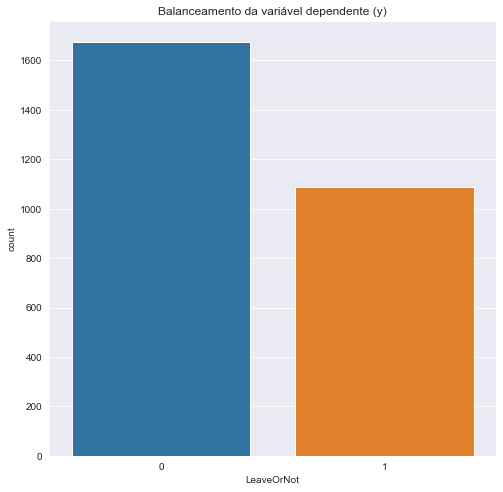

In [17]:
plt.figure(figsize=PLOT_MEDIUM)
sns.countplot(data, x='LeaveOrNot')
plt.title('Balanceamento da variável dependente (y)')
plt.show()

In [19]:
encoder = LabelEncoder()
for col in data.select_dtypes('object').columns:
    data[col] = encoder.fit_transform(data[col])

data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [20]:
y = data['LeaveOrNot']
X = data.drop('LeaveOrNot', axis=1)

In [33]:
def results(y_test_, y_pred_):
    cm = confusion_matrix(y_test_, y_pred_)
    print("Matriz de Confusão:\n\r")
    print(cm)

    accuracy = accuracy_score(y_test_, y_pred_)
    print("Accuracy Score = ", accuracy)

    class_report = classification_report(y_test_, y_pred_)
    print("Classification Report: \n\r")
    print(class_report)


def compute_regression(X_, y_, model_, normalize=False):
    print("=="*30)
    print(model_.__class__)
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)

    if normalize:
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.fit_transform(X_test)

    model_.fit(X_train, y_train)
    y_pred = model_.predict(X_test)

    results(y_test, y_pred)
    return model_, X_train 

model, X_train = compute_regression(X, y, DecisionTreeClassifier())
# compute_regression(X, y, KNeighborsClassifier())

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Matriz de Confusão:

[[247  86]
 [ 88 132]]
Accuracy Score =  0.6853526220614828
Classification Report: 

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       333
           1       0.61      0.60      0.60       220

    accuracy                           0.69       553
   macro avg       0.67      0.67      0.67       553
weighted avg       0.68      0.69      0.69       553



In [34]:
dot_data = export_graphviz(model, out_file=None, \
                            feature_names=X_train.columns, \
                            class_names=['Not Leave', 'Leave'], \
                            filled=True, rounded=True, \
                            special_characters=True)

graph = graphviz.Source(dot_data)